In [2]:
import pandas as pd 
import numpy as np 


df = pd.read_csv("C:\\cleaning data\\Dataset\\train.csv")
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [2]:
df.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [16]:
df['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

In [3]:
df_train = df.dropna()

In [5]:
df_train.shape


(11756, 18)

In [4]:
df_train['voice_gender'].value_counts()

Female    3955
Male      3907
Both      3894
Name: voice_gender, dtype: int64

In [12]:
df_train.isnull().any().sum()

0

In [104]:
from sklearn.preprocessing import LabelEncoder

LB = LabelEncoder()

df_train['voice_gender'] = LB.fit_transform(df_train['voice_gender'])
df_train['musician_category'] = LB.fit_transform(df_train['musician_category'])
df_train['key'] = LB.fit_transform(df_train['key'])
df_train['mode'] = LB.fit_transform(df_train['mode'])
df_train['music_genre'] = LB.fit_transform(df_train['music_genre'])

df_train['track_name'] = LB.fit_transform(df_train['track_name'])

df_train.head(50)

C:\Users\TANU\AppData\Local\Temp/ipykernel_7648/4005923827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['voice_gender'] = LB.fit_transform(df_train['voice_gender'])
C:\Users\TANU\AppData\Local\Temp/ipykernel_7648/4005923827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['musician_category'] = LB.fit_transform(df_train['musician_category'])
C:\Users\TANU\AppData\Local\Temp/ipykernel_7648/4005923827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
2,MSC_62017.0,9991,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,105.01799999999999,0,0.635525,5
4,MSC_71493.0,7659,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,112.18299999999999,0,0.074412,0
6,MSC_28346.0,4981,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,4,0.079220,-7.266,2,1,0.052014,104.95700000000001,0,0.484246,5
8,MSC_25657.0,4337,73.420,0.090830,0.380147,275490.630,0.714246,0.000000,0,0.089873,-5.972,0,1,0.070437,176.64700000000002,1,0.555169,6
9,MSC_54552.0,7390,34.034,1.014646,0.672051,207299.190,0.048039,0.146346,1,0.110850,-27.213,0,1,0.065935,117.155,1,0.590628,4
11,MSC_82740.0,1275,62.597,0.267935,0.912405,200294.994,0.633814,0.000000,4,0.091298,-5.270,1,1,0.340405,147.945,2,0.739298,5
12,MSC_86737.0,3873,69.231,0.000894,0.310477,235977.425,0.893819,0.000000,4,0.283206,-7.451,2,2,0.050829,164.611,0,0.557724,6
13,MSC_64882.0,2761,39.264,0.910839,0.401022,185250.384,0.222150,0.000000,8,0.297563,-13.321,1,2,0.035440,175.8,0,0.569514,4
14,MSC_79378.0,5110,56.018,0.060174,0.702752,221306.255,-1.000000,0.288298,0,0.296610,-5.996,2,2,0.053785,121.01700000000001,0,1.045423,4
15,MSC_90939.0,1637,37.895,1.019818,0.119268,726863.483,0.048119,0.419464,10,0.286549,-21.887,2,1,0.048279,80.955,0,0.039423,0


In [76]:
df_train['tempo'].shape


(10653,)

In [6]:
df_train.drop(df_train[df_train['tempo'] == '?'].index, inplace = True)


        

c:\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_train.shape

(10653, 18)

In [26]:
df_train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,105.01799999999999,0,0.635525,Rap
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,112.18299999999999,0,0.074412,Classical
6,MSC_28346.0,Love More,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,4,0.079220,-7.266,2,1,0.052014,104.95700000000001,0,0.484246,Rap
8,MSC_25657.0,Juke Box Hero,73.420,0.090830,0.380147,275490.630,0.714246,0.000000,0,0.089873,-5.972,0,1,0.070437,176.64700000000002,1,0.555169,Rock
9,MSC_54552.0,Shine on Harvest Moon,34.034,1.014646,0.672051,207299.190,0.048039,0.146346,1,0.110850,-27.213,0,1,0.065935,117.155,1,0.590628,Jazz


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

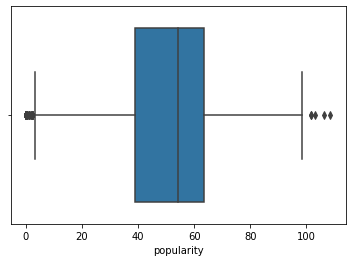

In [7]:
import seaborn as sns

sns.boxplot(df['popularity'])

In [28]:
df['popularity'] = [if x >for x in range(df['popularity'])]

50.822720327149405

In [9]:
df_train.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

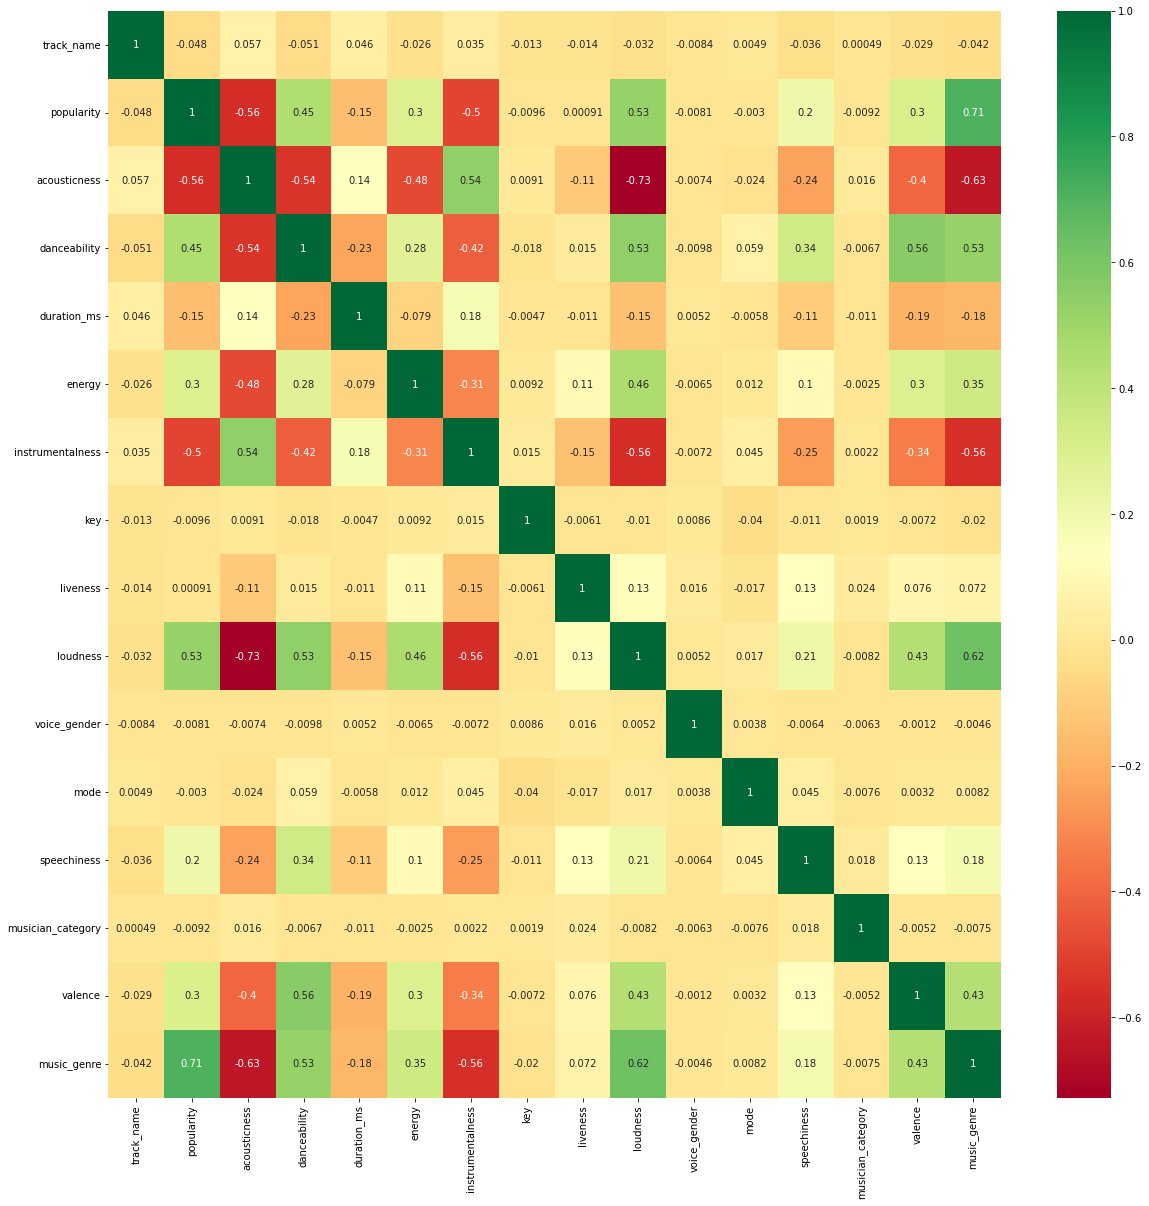

In [105]:
import matplotlib.pyplot as plt
X=df_train.iloc[:,1:16]
Y=df_train.iloc[:,-1]


corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valence'>

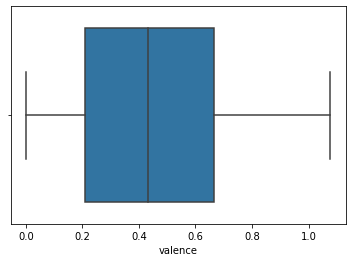

In [92]:
sns.boxplot(df_train['valence'])

In [91]:
df_train['valence'].value_counts()

0.635525    1
0.313336    1
0.226496    1
0.304279    1
0.215486    1
           ..
0.401194    1
0.091959    1
0.274845    1
0.156447    1
0.358777    1
Name: valence, Length: 10653, dtype: int64

In [169]:
features=df_train[['popularity','danceability','acousticness','instrumentalness']]
df_train['music_genre'] = LB.inverse_transform(df_train['music_genre'])
target= df_train['music_genre']






ValueError: y contains previously unseen labels: ['"42" - From SR3MM'
 '"Christen, ätzet diesen Tag", BWV 63: I. Choral "Christen, ätzet diesen Tag"'
 '"Concerto Funebre" con hautbois sordini e salmoè, violino principale e viole da gamba (Si Bem. Maggiore, RV 579): II. Allegro poco poco'
 '"Der Hölle Rache kocht in meinem Herzen"'
 '"Grande valse brillante" en Mi bémol majeur, Op. 18' '"Nessun dorma!"'
 '"Pastorale" Symphony No.6 in F Major, Op.68: I. Allegro ma non troppo']

In [164]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)


In [165]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

accuracy = model.score(X_test,y_test)

print(accuracy)

0.6916940403566401


# from sklearn.metrics import confusion_matrix

knn_predictions = model.predict(X_test)
confusion_matrix(y_test, knn_predictions)

In [95]:
from sklearn import svm

model2 = svm.SVC(kernel ='poly').fit(X_train,y_train)

model.score(X_test,y_test)

0.679023932426091

In [116]:
df_test1=pd.read_csv("C:\\cleaning data\\Dataset\\test.csv")
df_test1.shape

(3921, 17)

In [25]:
df_test = pd.read_csv("C:\\cleaning data\\Dataset\\test.csv")
df_test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [119]:
df_test1.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [142]:
df_test['speechiness'].value_counts()

0.038657    1
0.083414    1
0.425548    1
0.051224    1
0.405173    1
           ..
0.048809    1
0.062998    1
0.033263    1
0.043830    1
0.051685    1
Name: speechiness, Length: 2935, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='instrumentalness'>

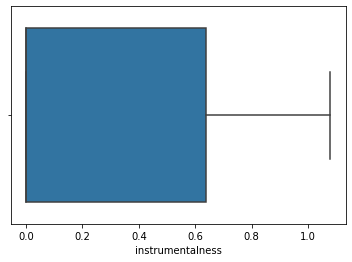

In [146]:
sns.boxplot(df['instrumentalness'])

In [143]:
for x in range(df['speechiness']):
    if x > 0.70000:
        x = 0.70000

TypeError: 'Series' object cannot be interpreted as an integer

In [151]:
df_test1['popularity'].fillna(value=df['popularity'].median(),inplace=True)
df_test1['danceability'].fillna(value=df['danceability'].median(),inplace=True)
df_test1['speechiness'].fillna(value=df['speechiness'].median(),inplace=True)
df_test1['valence'].fillna(value=df['valence'].median(),inplace=True)
df_test1['acousticness'].fillna(value=df['acousticness'].median(),inplace=True)
df_test1['instrumentalness'].fillna(value=df['instrumentalness'].median(),inplace=True)


In [152]:
df_test1.isnull().sum()

instance_id            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms           21
energy                33
instrumentalness       0
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            0
tempo                  0
musician_category    312
valence                0
dtype: int64

In [166]:
df_finaltest =df_test1[['popularity','danceability','speechiness','valence','acousticness','instrumentalness']]

final_pred = pd.Series(model.predict(df_finaltest), name="music_genre")

ID_column = df_test1['instance_id']
results = pd.concat([ID_column, final_pred], axis=1)

results.shape

(3921, 2)

In [161]:
results.to_csv('C:\\cleaning data\\dataset\\multiNB1.csv',index = False)


In [168]:
results


,instance_id,music_genre
0,MSC_70753.0,"""42"" - From SR3MM"
1,MSC_24064.0,"""Pastorale"" Symphony No.6 in F Major, Op.68: I..."
2,MSC_22731.0,"""Nessun dorma!"""
3,MSC_32095.0,"""Pastorale"" Symphony No.6 in F Major, Op.68: I..."
4,MSC_24198.0,"""Christen, ätzet diesen Tag"", BWV 63: I. Chora..."
...,...,...
3916,MSC_80955.0,"""42"" - From SR3MM"
3917,MSC_72767.0,"""Pastorale"" Symphony No.6 in F Major, Op.68: I..."
3918,MSC_40192.0,"""42"" - From SR3MM"
3919,MSC_56067.0,"""Grande valse brillante"" en Mi bémol majeur, O..."
